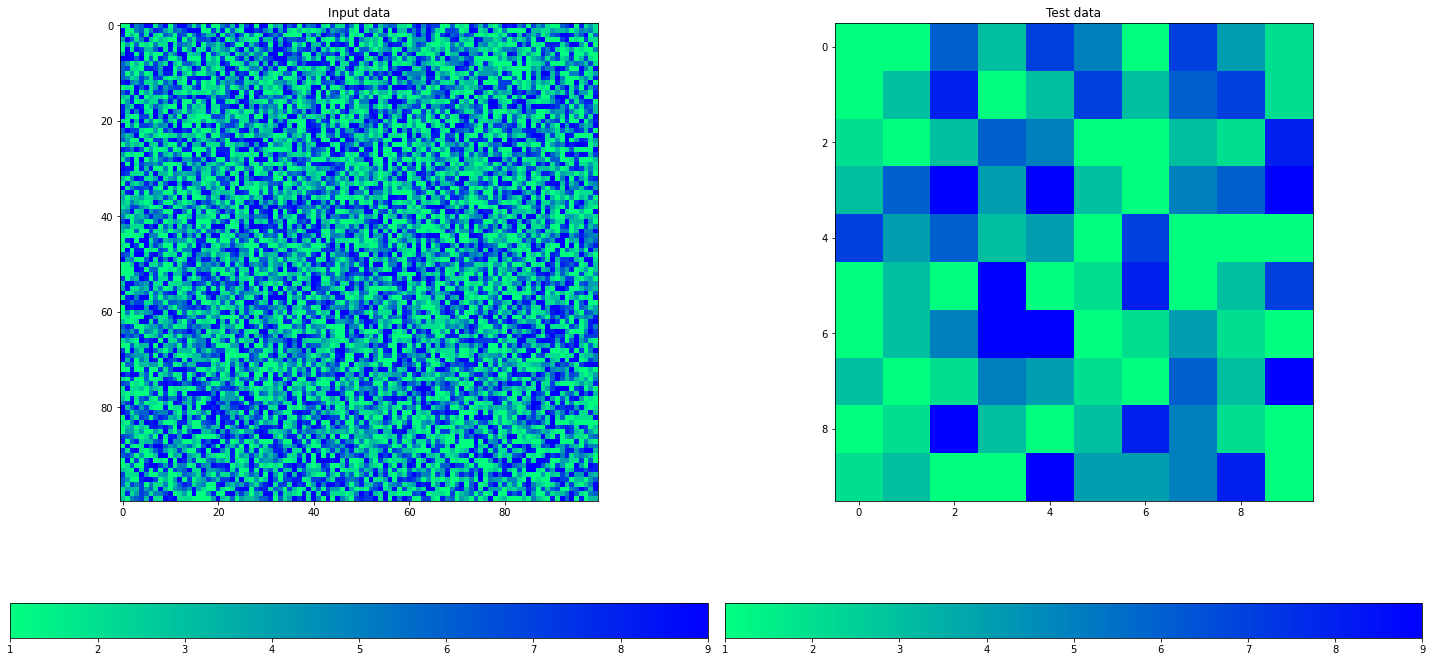

In [1]:
import numpy as np
from matplotlib import pyplot as plt


def get_data(filename):
    with open(filename) as file:
        lines = [list(f.strip()) for f in file]
        return np.matrix(lines, dtype=np.int8)


fig, (ax1, ax2) = plt.subplots(figsize=(20, 10), ncols=2)
fig.set_tight_layout("tight")
ax1.set_title("Input data")
im_ax1 = ax1.imshow(get_data("input"), cmap="winter_r")
_ = fig.colorbar(im_ax1, ax=ax1, location="bottom")

ax2.set_title("Test data")
im_ax2 = ax2.imshow(get_data("test"), cmap="winter_r")
_ = fig.colorbar(im_ax2, ax=ax2, location="bottom")


In [2]:
grid = get_data('test')
grid

matrix([[1, 1, 6, 3, 7, 5, 1, 7, 4, 2],
        [1, 3, 8, 1, 3, 7, 3, 6, 7, 2],
        [2, 1, 3, 6, 5, 1, 1, 3, 2, 8],
        [3, 6, 9, 4, 9, 3, 1, 5, 6, 9],
        [7, 4, 6, 3, 4, 1, 7, 1, 1, 1],
        [1, 3, 1, 9, 1, 2, 8, 1, 3, 7],
        [1, 3, 5, 9, 9, 1, 2, 4, 2, 1],
        [3, 1, 2, 5, 4, 2, 1, 6, 3, 9],
        [1, 2, 9, 3, 1, 3, 8, 5, 2, 1],
        [2, 3, 1, 1, 9, 4, 4, 5, 8, 1]], dtype=int8)

In [3]:
import networkx as nx

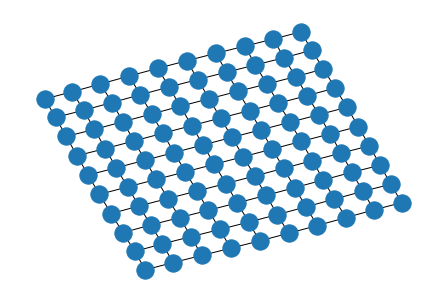

In [4]:
graph = nx.grid_2d_graph(*grid.shape)
for x, y in graph.nodes:
    # print(x,y, grid[x,y])
    graph.nodes[x,y]['w'] = grid[x,y]
    
nx.draw_kamada_kawai(graph)

In [5]:
graph.nodes[0,0]['w']

1

In [6]:
grid = get_data('input')
lim_x, lim_y = grid.shape
graph = nx.grid_2d_graph(lim_x, lim_y)

end_node = (lim_x -1, lim_y -1)

for x, y in graph.nodes:
    # print(x,y, grid[x,y])
    graph.nodes[x,y]['w'] = grid[x,y]

path = nx.shortest_path(graph, (0,0), end_node, weight=lambda u,v,d: graph.nodes[u]['w'])

sum([grid[n] for n in path]) - grid[0,0]

423

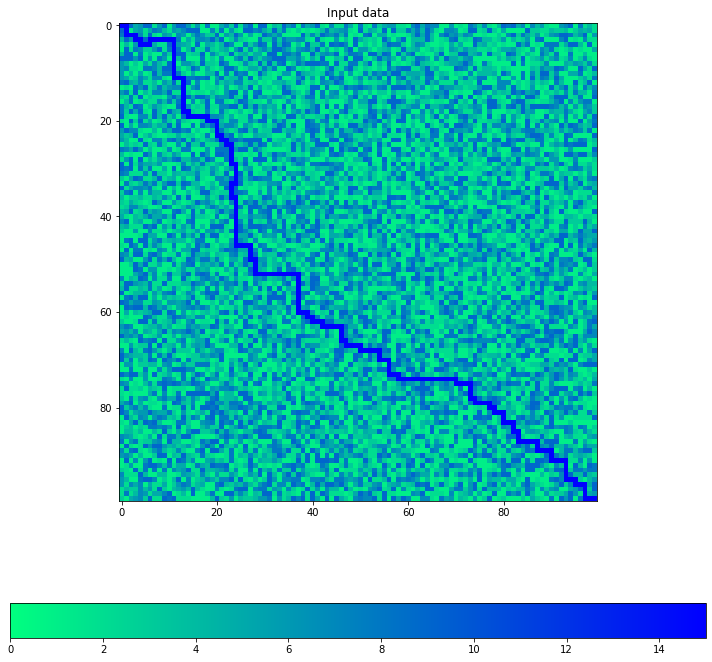

In [7]:
n_grid = grid.copy()

for x,y in path:
    n_grid[x,y] = 15
    # graph.nodes[x,y]['w']

fig, (ax1) = plt.subplots(figsize=(10, 10), ncols=1)
fig.set_tight_layout("tight")
ax1.set_title("Input data")
im_ax1 = ax1.imshow(n_grid, cmap="winter_r", vmin=0)
_ = fig.colorbar(im_ax1, ax=ax1, location="bottom")


## Part 2

In [8]:
test = np.array(get_data('test'))

(50, 50)


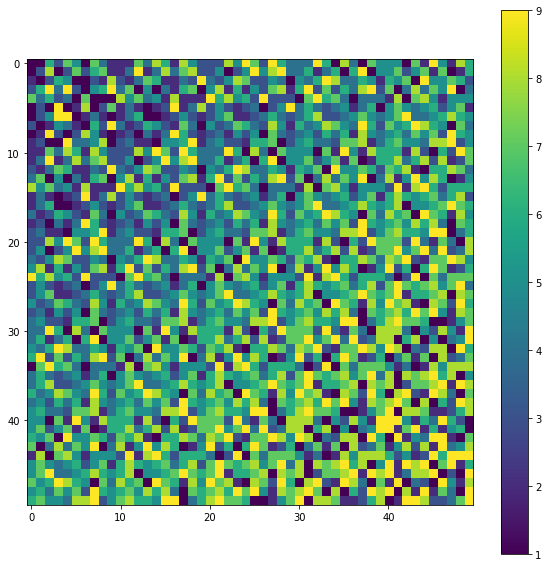

In [9]:
def get_pt2_data(filename):
    d = np.array(get_data(filename))
    nrow = np.hstack([d + n for n in range(5)])
    new_grid = np.vstack([nrow + n for n in range(5)])
    new_grid %= 9
    new_grid[new_grid == 0] = 9
    return new_grid

test = get_pt2_data('test')
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(test)
fig.colorbar(im)
print(test.shape)
# ''.join(test[12].astype('str'))

In [10]:
grid = get_pt2_data('test')
graph = nx.grid_2d_graph(*grid.shape)
for x, y in graph.nodes:
    # print(x,y, grid[x,y])
    graph.nodes[x,y]['w'] = grid[x,y]

# nx.draw_kamada_kawai(graph)

In [11]:
grid = get_pt2_data('input')
lim_x, lim_y = grid.shape
graph = nx.grid_2d_graph(lim_x, lim_y)

end_node = (lim_x -1, lim_y -1)

for x, y in graph.nodes:
    # print(x,y, grid[x,y])
    graph.nodes[x,y]['w'] = grid[x,y]

path = nx.shortest_path(graph, (0,0), end_node, weight=lambda u,v,d: graph.nodes[u]['w'])

sum([grid[n] for n in path]) - grid[0,0]

2778

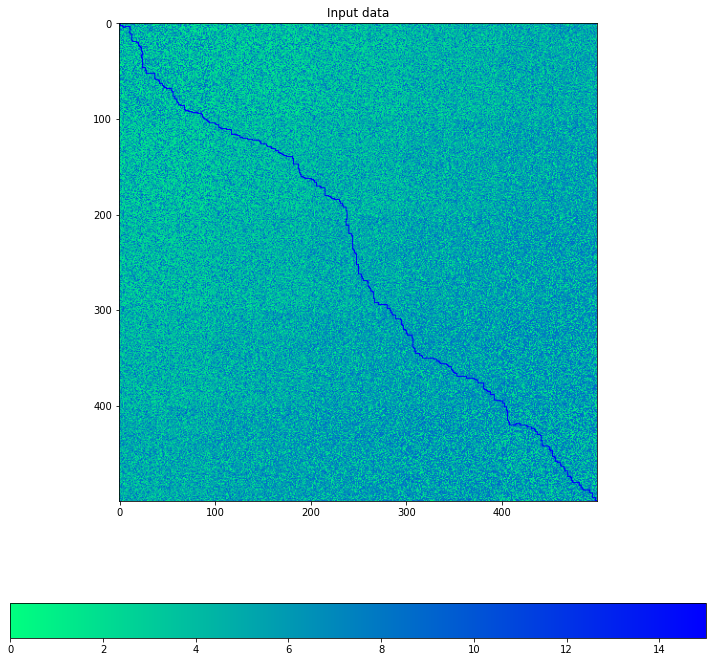

In [12]:
n_grid = grid.copy()

for x,y in path:
    n_grid[x,y] = 15
    # graph.nodes[x,y]['w']

fig, (ax1) = plt.subplots(figsize=(10, 10), ncols=1)
fig.set_tight_layout("tight")
ax1.set_title("Input data")
im_ax1 = ax1.imshow(n_grid, cmap="winter_r", vmin=0)
_ = fig.colorbar(im_ax1, ax=ax1, location="bottom")
